In [56]:
# World Masters Athletics (WMA) Age-graded track tables can be found on
# Howard Grubb's website:
# http://www.howardgrubb.co.uk/athletics/data/wavacalc06.xls

library(rvest)
library(readr)
library(stringr)
library(dplyr)
library(tidyr)
library(readxl)
library(lubridate)
library(patchwork)
library(ggplot2)

setwd('C:/Users/Packr1/Documents/Personal/Track')
WMA_Women <- read_xls('wavacalc06.xls', sheet = 1) %>%
    select(2:ncol(.)) %>%
    mutate(dist_m = 1000 * `dist(km)`) %>%
    mutate(Sex = 'F') %>%
              dplyr::filter(dist_m > 0 & 
                            !grepl('Road', Event))
              print(nrow(WMA_Women) - nrow(WMA_Women %>% distinct(dist_m)))
              message("Expecting 0 so no duplicate distance")
WMA_Men   <- read_xls('wavacalc06.xls', sheet = 2) %>%
              select(2:ncol(.)) %>%
              mutate(dist_m = 1000 * `dist(km)`) %>%
              mutate(Sex = 'M') %>%
              dplyr::filter(dist_m > 0 & 
                            !grepl('Road', Event))
              print(nrow(WMA_Men) - nrow(WMA_Men %>% distinct(dist_m)))
              message("Expecting 0 so no duplicate distance")

track_file <- "C:/Users/Packr1/Documents/Personal/Track/track_res.csv"
track_res  <- read_csv(track_file)
pics_dir   <- 'C:/Users/Packr1/Documents/Personal/Track/Godiva/Jupyter_Pics/'

[1] 0


Expecting 0 so no duplicate distance


[1] 0


Expecting 0 so no duplicate distance
Parsed with column specification:
cols(
  Name = col_character(),
  Sex = col_character(),
  Age = col_integer(),
  Time = col_character(),
  ct_evt = col_integer(),
  Event = col_character(),
  mins = col_integer(),
  secs = col_character(),
  track_time = col_double(),
  temp_dist = col_character(),
  dist_m = col_integer(),
  Place = col_integer(),
  Max_Hamlyn_pts = col_integer(),
  Date_Meet = col_date(format = ""),
  agegrp = col_character()
)


In [57]:
track_res %>% group_by(Name, Sex, Event, Date_Meet) %>% 
         summarise(ct = n()) %>% dplyr::filter(ct > 1) %>% ungroup()

Name,Sex,Event,Date_Meet,ct
Aimee Bazin,F,100m Dash,2014-07-23,2
Aimee Bazin,F,200m,2013-07-10,2
Alex Andre,M,200m,2013-07-10,2
Alex Emmons,M,Mile Run,2016-07-13,2
Alex Taylor,M,200m,2009-07-15,2
Aline Lloyd,F,200m,2013-07-10,2
Barbara Hindenach,F,100m Dash,2014-07-23,2
Barbara Hindenach,F,200m,2009-07-15,2
Barbara Hindenach,F,200m,2013-07-10,2
Barbara Hindenach,F,800 Meter Run,2016-06-29,2


In [58]:
track_res %>% dplyr::filter(str_trim(Name) == 'Aimee Bazin' & 
                            str_trim(toupper(Event)) == '100M DASH' &
                            Date_Meet == '2014-07-23')

Name,Sex,Age,Time,ct_evt,Event,mins,secs,track_time,temp_dist,dist_m,Place,Max_Hamlyn_pts,Date_Meet,agegrp
Aimee Bazin,F,31,18.1,2000,100m Dash,0,18.1,18.1,100m,NA,6,0,2014-07-23,Age 30 - 34
Aimee Bazin,F,31,11:14,2000,100m Dash,11,14,674.0,100m,NA,21,0,2014-07-23,Age 30 - 34


In [59]:
# Use of :: means object on the left is a package
png(paste0(pics_dir, "dupe_name_no_strong_tag.PNG"))


In [60]:
# Select the fastest time whenever there are duplicates per name, event, date
track_res <- track_res %>% 
               group_by(Name, Event, Date_Meet) %>%
               slice(which.min(track_time)) %>% ungroup()
track_res %>% group_by(Name, Sex, Event, Date_Meet) %>% 
         summarise(ct = n()) %>% dplyr::filter(ct > 1)

Name,Sex,Event,Date_Meet,ct


In [61]:
track_res %>% dplyr::filter(str_trim(Name) == 'Aimee Bazin' & 
                            str_trim(toupper(Event)) == '100M DASH' &
                            Date_Meet == '2014-07-23')

Name,Sex,Age,Time,ct_evt,Event,mins,secs,track_time,temp_dist,dist_m,Place,Max_Hamlyn_pts,Date_Meet,agegrp
Aimee Bazin,F,31,18.1,2000,100m Dash,0,18.1,18.1,100m,NA,6,0,2014-07-23,Age 30 - 34


In [62]:
track_res <- track_res %>% dplyr::filter(!is.na(Age)) %>%
    distinct(Name, Sex, Event, Date_Meet, .keep_all = TRUE)
track_res <- track_res %>% dplyr::filter(!is.na(agegrp)) %>%
              # Age-graded track tables start at age 4
              dplyr::filter(Age > 4) 

In [63]:
m_ages_l <- length(unique(track_res %>% dplyr::filter(Sex=='M') %>% pull(Age)))
f_ages_l <- length(unique(track_res %>% dplyr::filter(Sex=='F') %>% pull(Age)))
m_ages <- unique(track_res %>% dplyr::filter(Sex=='M') %>% pull(Age))
f_ages <- unique(track_res %>% dplyr::filter(Sex=='F') %>% pull(Age))
dat_m1 <- data.frame()
dat_f1 <- data.frame()

for(m_age in 1:m_ages_l){
    m_age_in   <- m_ages[m_age]
    # Notice need sym instead of enquo and as.character because sym 
    # requires string
    m_age_nam  <- sym(as.character(m_age_in))
    WMA_Men_in <- WMA_Men %>% mutate(agefactor := !!m_age_nam) %>%
                    select(agefactor, dist_m, Sex)
      dat_m1_0 <- track_res %>% dplyr::filter(Age == m_age_in) %>%
                     inner_join(., WMA_Men_in, by = c("Sex", "dist_m")) %>%
                     mutate(age_grade_track_time = track_time * agefactor) %>%
                     select(Name, Sex, Date_Meet, dist_m, age_grade_track_time, agefactor)
      dat_m1   <- bind_rows(dat_m1, dat_m1_0)
}

for(f_age in 1:f_ages_l){
    f_age_in   <- f_ages[f_age]
    # Notice need sym instead of enquo and as.character because sym 
    # requires string
    f_age_nam  <- sym(as.character(f_age_in))
    WMA_Women_in <- WMA_Women %>% mutate(agefactor := !!f_age_nam) %>%
                     select(agefactor, dist_m, Sex)
      dat_f1_0 <- track_res %>% dplyr::filter(Age == f_age_in) %>%
                     inner_join(., WMA_Women_in, by = c("Sex", "dist_m")) %>%
                     mutate(age_grade_track_time = track_time * agefactor) %>%
                     select(Name, Sex, Date_Meet, dist_m, age_grade_track_time, agefactor)
      dat_f1   <- bind_rows(dat_f1, dat_f1_0)
}

dat_all <- bind_rows(dat_m1, dat_f1)
track_res_all <- left_join(track_res, dat_all, by = c("Name", "Sex", "Date_Meet", "dist_m"))

track_res_all <- track_res_all %>% dplyr::filter(!is.na(agegrp)) %>%
                    arrange(track_time) 

track_res_age <- track_res_all %>%
    group_by(dist_m, agegrp) %>%
    summarise(median_age = median(track_time)) %>%
    ungroup()

track_res_ind <- track_res_all %>%
    group_by(dist_m, Name) %>%
    summarise(median_ind = median(track_time)) %>%
    ungroup()

track_res_age_age <- track_res_all %>%
    group_by(dist_m, agegrp) %>%
    summarise(median_age = median(age_grade_track_time)) %>%
    ungroup()

track_res_ind_age <- track_res_all %>%
    group_by(dist_m, Name) %>%
    summarise(median_ind = median(age_grade_track_time)) %>%
    ungroup()

In [64]:
track_res_age_age %>% dplyr::filter(is.na(median_age)) %>% janitor::tabyl(dist_m) %>% arrange(desc(n))

dist_m,n,percent,valid_percent
NA,13,0.325,NA
3,12,0.300,0.44444444
5,10,0.250,0.37037037
1609,3,0.075,0.11111111
200,1,0.025,0.03703704
800,1,0.025,0.03703704


In [82]:
plotfunc <- function(dist=100, subtitl_txt="", gender=c("M", "F"), sz = 16, yr = 2018){
    
    track_res_all_top3age <-
        track_res_all %>%
        dplyr::filter(Sex %in% gender & dist_m == dist) %>%
        dplyr::filter(year(Date_Meet)==yr) %>%
        group_by(Name) %>%
        slice(which.min(track_time)) %>%
        group_by(agegrp) %>%
        top_n(-3, track_time) %>%
        mutate(Name = paste0(Name, " (", Age, ")")) %>%
        ungroup() %>%
        arrange(track_time)
        
    ggplot(track_res_all_top3age, aes(x = reorder(Name, desc(track_time)), y = track_time)) +
               geom_point(stat='identity', aes(col=agegrp), size = 6) +
               scale_color_viridis_d(name='Age Group') +
               xlab("Runner's Name (Age)") +
               ylab("Run time (seconds)") +
               ggtitle(paste0("Carolina Godiva Track Club Summer Track Series (", yr, ")"),
                       subtitle = subtitl_txt) +
        theme(plot.title = element_text(hjust = 0.5, color = '#EEEEEE',
                                        size = sz),
              plot.subtitle = element_text(hjust = 0.5, color = '#EEEEEE',
                                           size = sz * 20/28),
              text = element_text(size = 14, color = '#EEEEEE'),
              axis.text = element_text(size = 10, color = '#EEEEEE'),
              legend.text = element_text(size = 12, color = '#EEEEEE'),
              legend.background = element_rect(fill = '#333333'),
              panel.background = element_rect(fill = '#333333'),
              strip.background = element_rect(fill = '#333333'),
              plot.background = element_rect(fill = '#333333')) +
               coord_flip()
}

In [72]:
plotfunc_grade <- function(dist=100, subtitl_txt="", gender=c("M", "F"), sz = 16, yr = 2018){
    
    track_res_all_top3age_grade <-
        track_res_all %>%
        dplyr::filter(Sex %in% gender & dist_m == dist) %>%
        dplyr::filter(year(Date_Meet)==yr) %>%
        group_by(Name) %>%
        slice(which.min(track_time)) %>%
        group_by(agegrp) %>%
        top_n(-3, age_grade_track_time) %>%
        mutate(Name = paste0(Name, " (", Age, ")")) %>%
        ungroup() %>%
        arrange(age_grade_track_time)
    
    ggplot(track_res_all_top3age_grade, aes(x = reorder(Name, desc(age_grade_track_time)), y = age_grade_track_time)) +
        geom_point(stat='identity', aes(col=agegrp), size = 6) +
        scale_color_viridis_d(name='Age Group') +
        xlab("Runner's Name (Age)") +
        ylab("Age-Graded run time (seconds)") +
        ggtitle(paste0("Carolina Godiva Track Club Summer Track Series (", yr, ")"),
                subtitle = subtitl_txt) +
        theme(plot.title = element_text(hjust = 0.5, color = '#EEEEEE',
                                        size = sz),
              plot.subtitle = element_text(hjust = 0.5, color = '#EEEEEE',
                                           size = sz * 20/28),
              text = element_text(size = 14, color = '#EEEEEE'),
              axis.text = element_text(size = 10, color = '#EEEEEE'),
              legend.text = element_text(size = 12, color = '#EEEEEE'),
              legend.background = element_rect(fill = '#333333'),
              panel.background = element_rect(fill = '#333333'),
              strip.background = element_rect(fill = '#333333'),
              plot.background = element_rect(fill = '#333333')) +
        coord_flip()
}

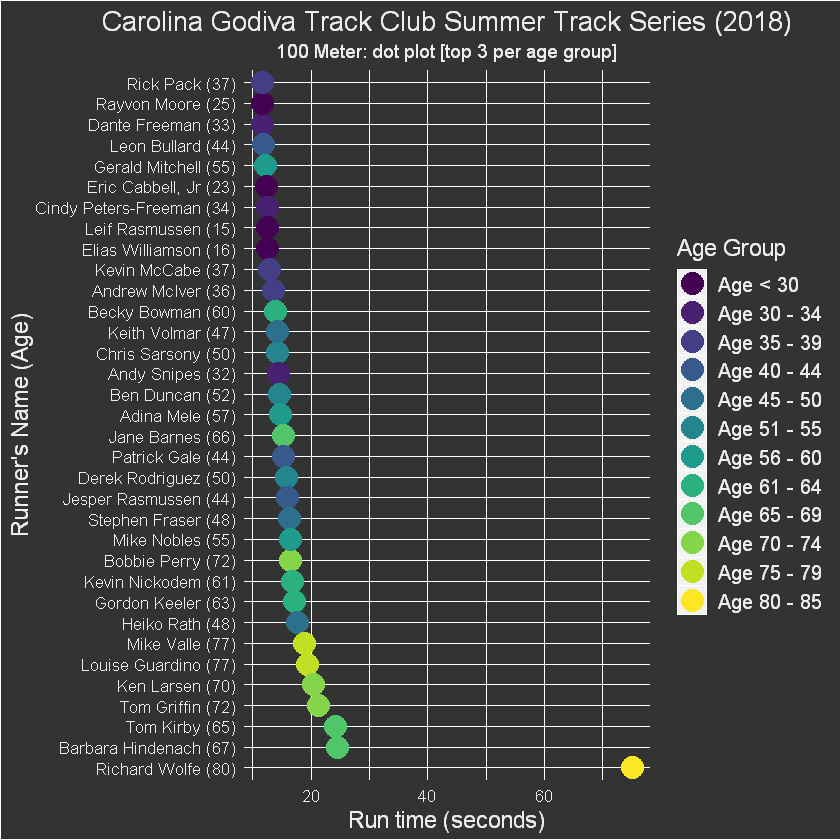

In [83]:
plotfunc(dist=100, "100 Meter: dot plot [top 3 per age group]", c("M", "F"), yr = 2018)

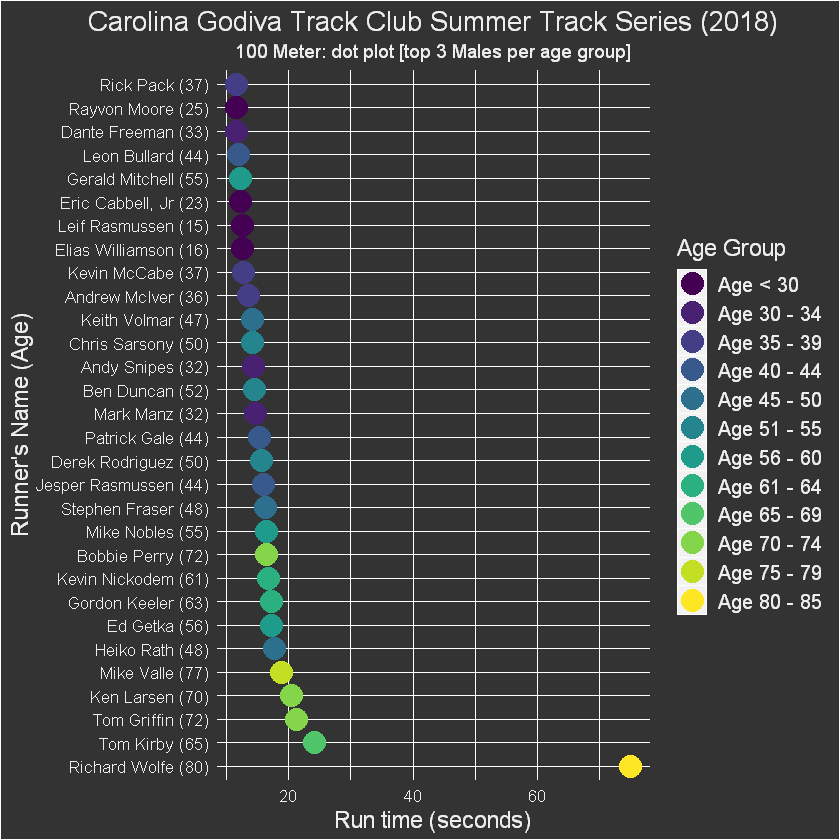

In [85]:
plotfunc(dist=100, "100 Meter: dot plot [top 3 Males per age group]", c("M"), yr = 2018)

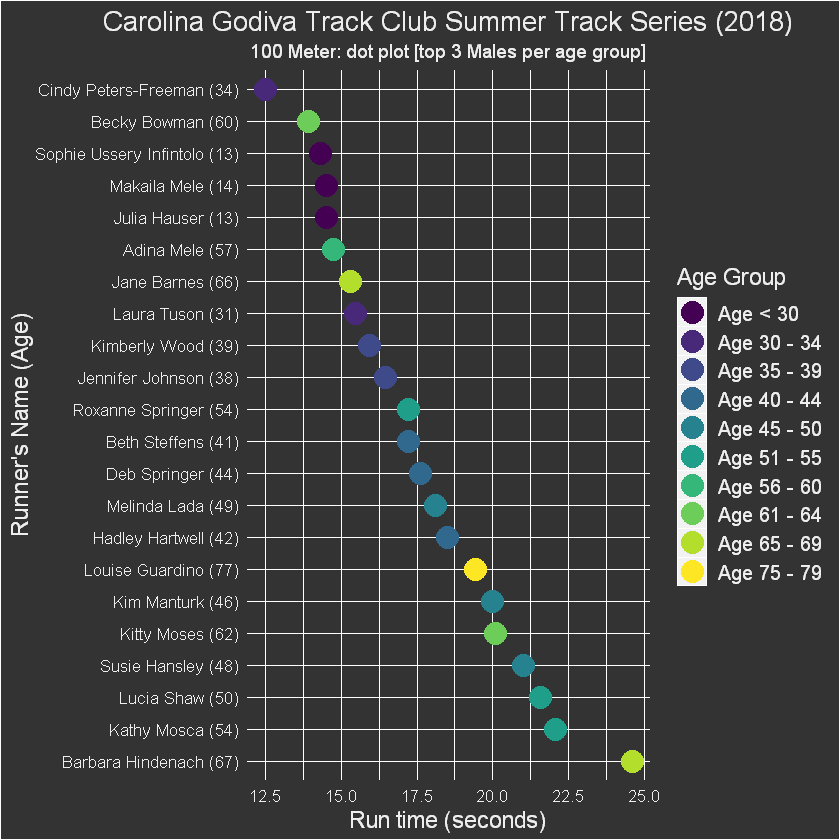

In [86]:
plotfunc(dist=100, "100 Meter: dot plot [top 3 Females per age group]", c("F"), yr = 2018)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected input
1: %R X=c(1,4,5,7); sd(X); mean(X)
    ^
